## Provisional Code with functions for EDA and a Logistic Regression Model Just in case.

In [1]:
import warnings
warnings.filterwarnings("ignore")
# Libraries to read and manipulate data
import pandas as pd
import numpy as np

# libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
# from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
data = pd.read_csv('../Resources/new_games.csv')
# copying data to preserve original
games_data = data.copy()

In [3]:
games_data.head()

,Unnamed: 0,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,0,2022-03-12,1610612748,1610612750,104.000,0.398,0.760,0.333,23.000,53.000,113.000,0.422,0.875,0.357,21.000,46.000,0
1,1,2022-03-12,1610612741,1610612739,101.000,0.443,0.933,0.429,20.000,46.000,91.000,0.419,0.824,0.208,19.000,40.000,1
2,2,2022-03-12,1610612759,1610612754,108.000,0.412,0.813,0.324,28.000,52.000,119.000,0.489,1.000,0.389,23.000,47.000,0
3,3,2022-03-12,1610612744,1610612749,122.000,0.484,0.933,0.400,33.000,55.000,109.000,0.413,0.696,0.386,27.000,39.000,1
4,4,2022-03-12,1610612743,1610612761,115.000,0.551,0.750,0.407,32.000,39.000,127.000,0.471,0.760,0.387,28.000,50.000,0


In [4]:
#check for nulls
games_data.isna().sum()

Unnamed: 0          0
GAME_DATE_EST       0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
PTS_home           99
FG_PCT_home        99
FT_PCT_home        99
FG3_PCT_home       99
AST_home           99
REB_home           99
PTS_away           99
FG_PCT_away        99
FT_PCT_away        99
FG3_PCT_away       99
AST_away           99
REB_away           99
HOME_TEAM_WINS      0
dtype: int64

In [5]:
games_data = games_data.dropna()

In [19]:
games_data.isna().sum()

Unnamed: 0         0
GAME_DATE_EST      0
HOME_TEAM_ID       0
VISITOR_TEAM_ID    0
PTS_home           0
FG_PCT_home        0
FT_PCT_home        0
FG3_PCT_home       0
AST_home           0
REB_home           0
PTS_away           0
FG_PCT_away        0
FT_PCT_away        0
FG3_PCT_away       0
AST_away           0
REB_away           0
HOME_TEAM_WINS     0
dtype: int64

In [20]:
X = games_data.drop(['HOME_TEAM_WINS', 'GAME_DATE_EST', 'Unnamed: 0', 'PTS_home', 'PTS_away'],axis=1)
y = games_data['HOME_TEAM_WINS']

In [21]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, stratify=y)
print(X_train.shape, X_test.shape)

(19272, 12) (6425, 12)


In [22]:
# Use Scaler
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

In [23]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
# Using Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=300)

In [25]:
y_predict = rfc.predict(X_test_scaled)

In [26]:
# Fancy confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):

    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

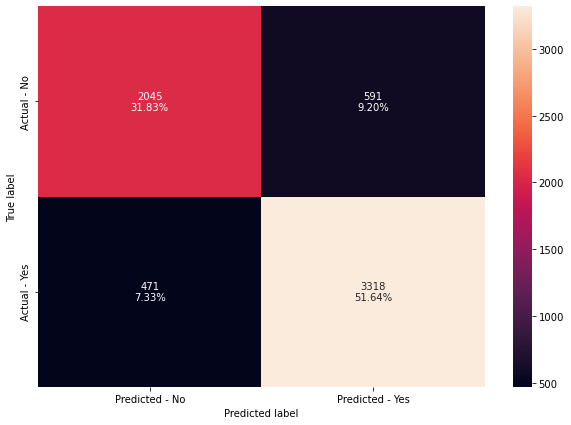

In [27]:
make_confusion_matrix(rfc, y_test)

In [28]:
print(f"Accuracy Score : {accuracy_score(y_test, y_predict)}")
print("Classification Report:")
print(classification_report(y_test, y_predict))

Accuracy Score : 0.8347081712062256
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2636
           1       0.85      0.88      0.86      3789

    accuracy                           0.83      6425
   macro avg       0.83      0.83      0.83      6425
weighted avg       0.83      0.83      0.83      6425



In [33]:
pd.DataFrame({"Prediction": y_predict, "Actual": y_test}).head(25)

,Prediction,Actual
8691,1,1
6837,1,1
7577,0,0
18834,1,1
47,1,1
1358,1,1
8076,0,0
3099,1,1
23757,0,0
18584,0,0


In [31]:
sorted(zip(rfc.feature_importances_, X.columns), reverse=True)

[(0.19140303770639003, 'FG_PCT_home'),
 (0.18917440748919528, 'FG_PCT_away'),
 (0.08665447399060704, 'FG3_PCT_home'),
 (0.08552362450681046, 'FG3_PCT_away'),
 (0.06893408360761927, 'REB_away'),
 (0.06746116306306782, 'REB_home'),
 (0.06265533901150584, 'AST_home'),
 (0.06008700977892858, 'AST_away'),
 (0.05606464837478889, 'FT_PCT_away'),
 (0.05535962610579285, 'FT_PCT_home'),
 (0.03886602077713581, 'HOME_TEAM_ID'),
 (0.03781656558815817, 'VISITOR_TEAM_ID')]